# Aufgabe zur Klima- und Schneeanalyse

Analysiert je für eine Station (Ramsau am Dachstein bzw. Station Patscherkofel) die Veränderung der Schneedeckentage im Zusammenhang mit der Veränderung von Temperatur und Niederschlag. Ihr findet dazu im bereitgestellten Ordner die entsprechenden Daten zu Schnee- (Snow*.csv) und Klimabedingungen (Meteo*.dat). 

Die Schneeinformation liegt vor in cm Schneehöhe, ein Wert von -1 repräsentiert keinen vorhanden Schnee (für die Aggregierungen muss dieser Wert entsprechend behandelt werden). Ein Schneedeckentag ist hier definiert als ein Tag mit einer Schneehöhe von > 0 cm.

Stellt die Änderung für Temperatur, Niederschlag und Schneedeckentage i) als Trend (inklusive Signifikanztest) über den Zeitraum 1995-2015 als Diagramm dar, sowie ii) als Vergleich der mittleren monatlichen Verhältnisse 1995-2004 vs 2005-2014.


Zu Berücksichtigen:

1) Die Schneedaten haben ein seltsames Datum (z.B. 19800120 für den 20.01.1980) ohne Trennzeichen, dieses Datum wird automatisch zunächst als Zahl eingelesen. Ihr müsst also um diese Zahl in ein Datum zu konvertieren, diese zunächst in eine Zeichenfolge (Character) verwandeln - da die Datumsinformation hier nicht eindeutig ist, muss noch angeben werden, dass die Jahresinformation direkt von einer Monats- und dann Tagesinformation gefolgt wird ("%Y%m%d"): 






	One Sample t-test

data:  tempYearly$meanTemp_calculated
t = 70.837, df = 20, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
0 percent confidence interval:
 5.77481 5.77481
sample estimates:
mean of x 
  5.77481 



	One Sample t-test

data:  precipYearly$sumPrecip_calculated
t = 165.99, df = 20, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
0 percent confidence interval:
 1159.543 1159.543
sample estimates:
mean of x 
 1159.543 


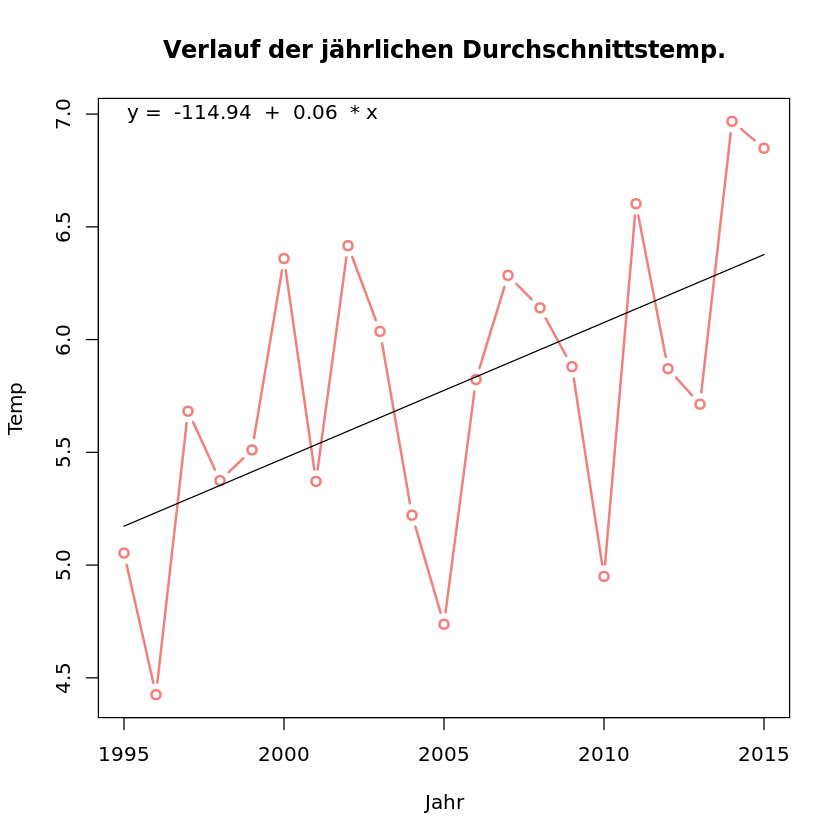


	One Sample t-test

data:  snowDays$snowDays_calculated
t = 56.704, df = 20, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
0 percent confidence interval:
 138 138
sample estimates:
mean of x 
      138 


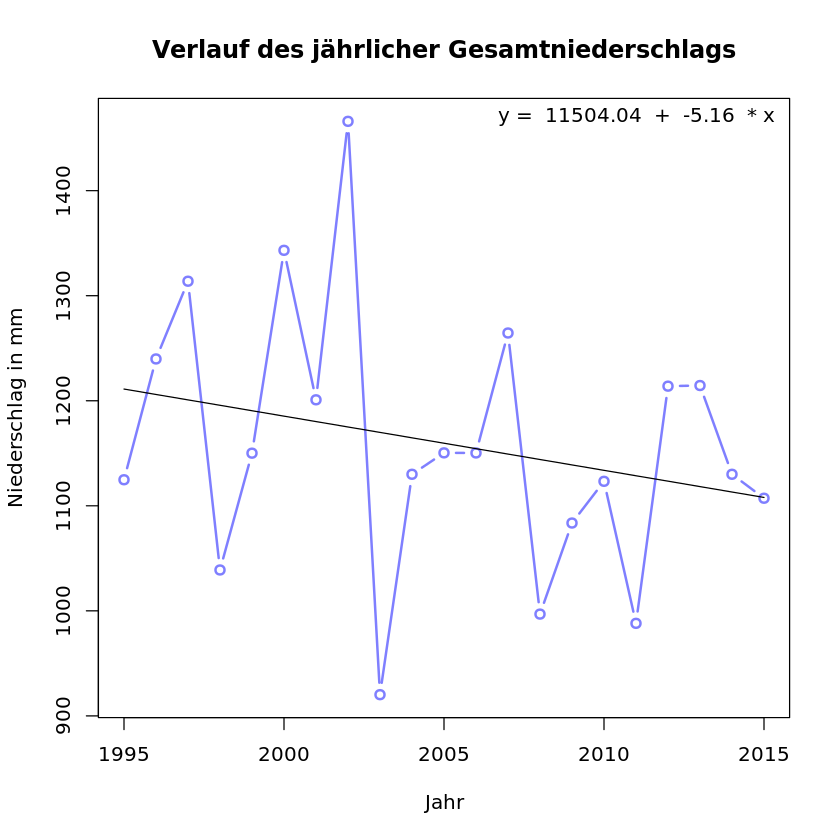

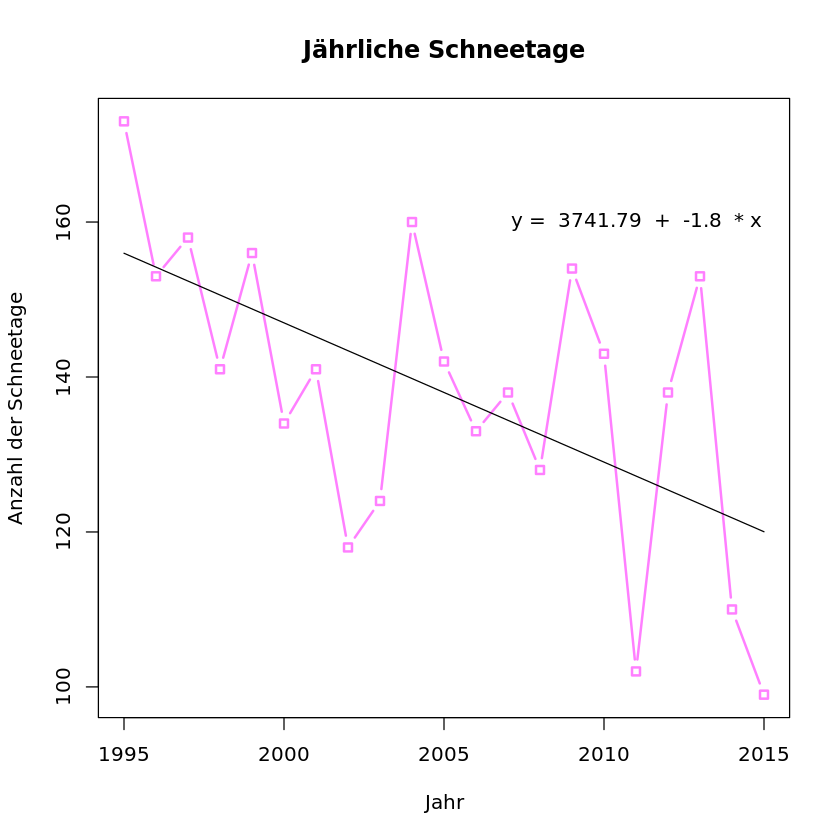

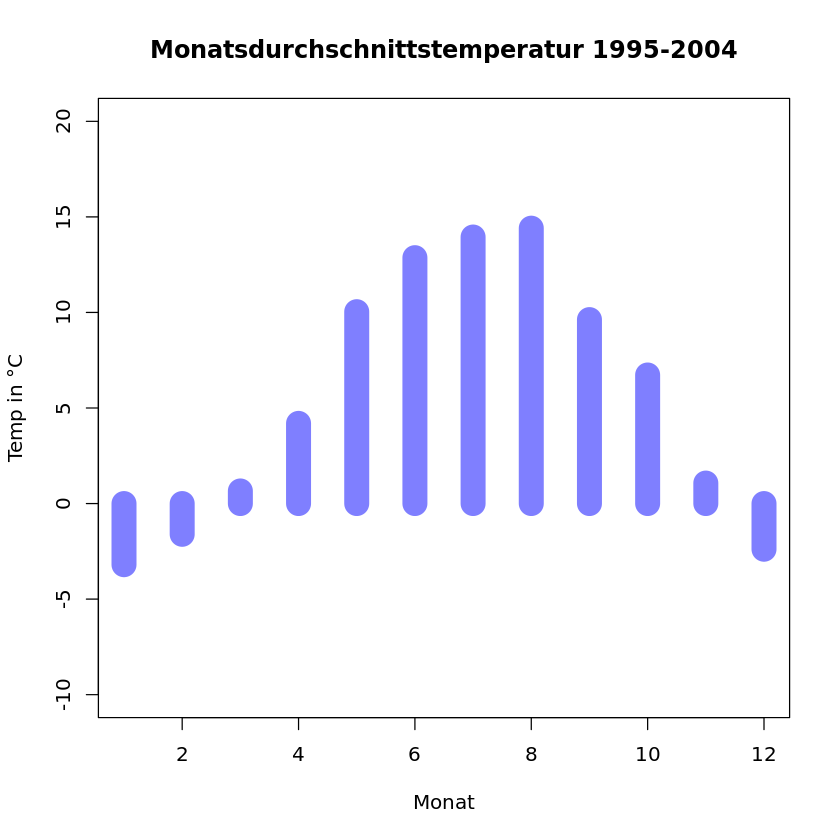

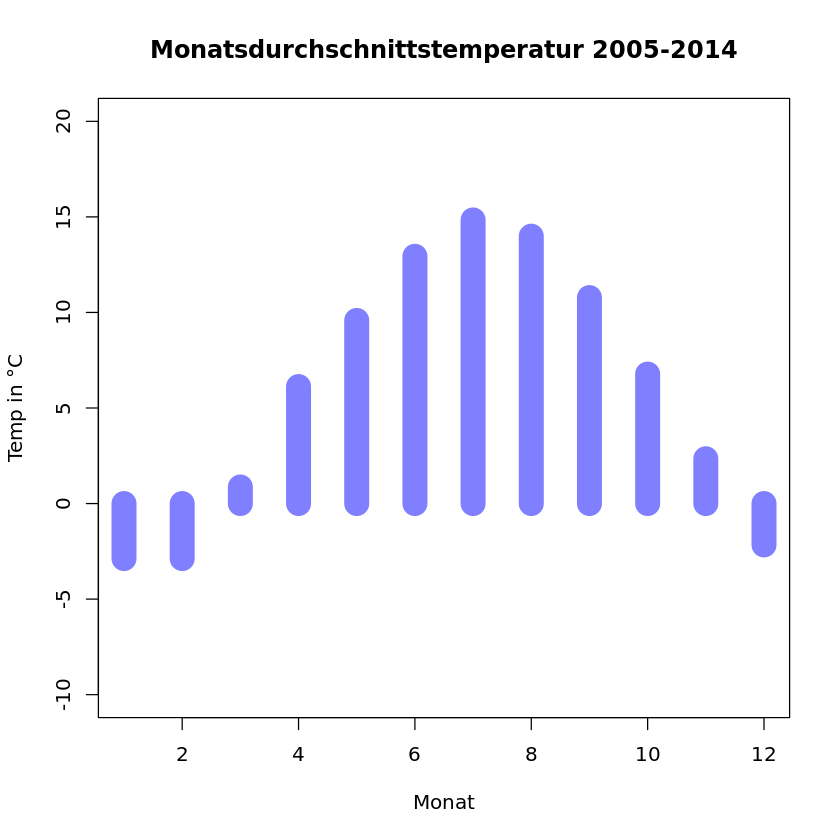

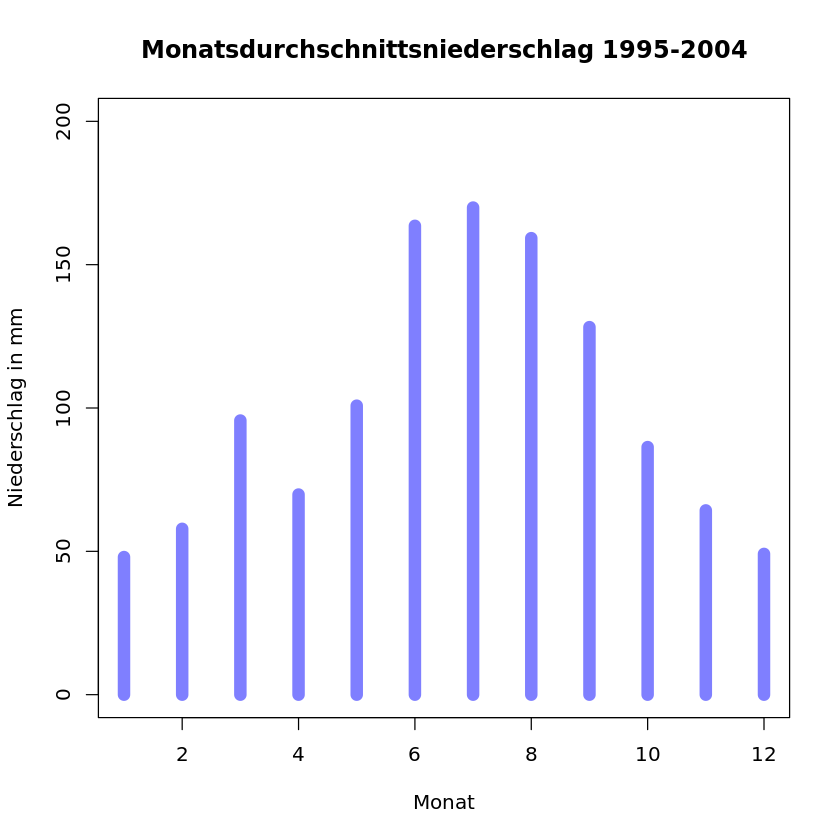

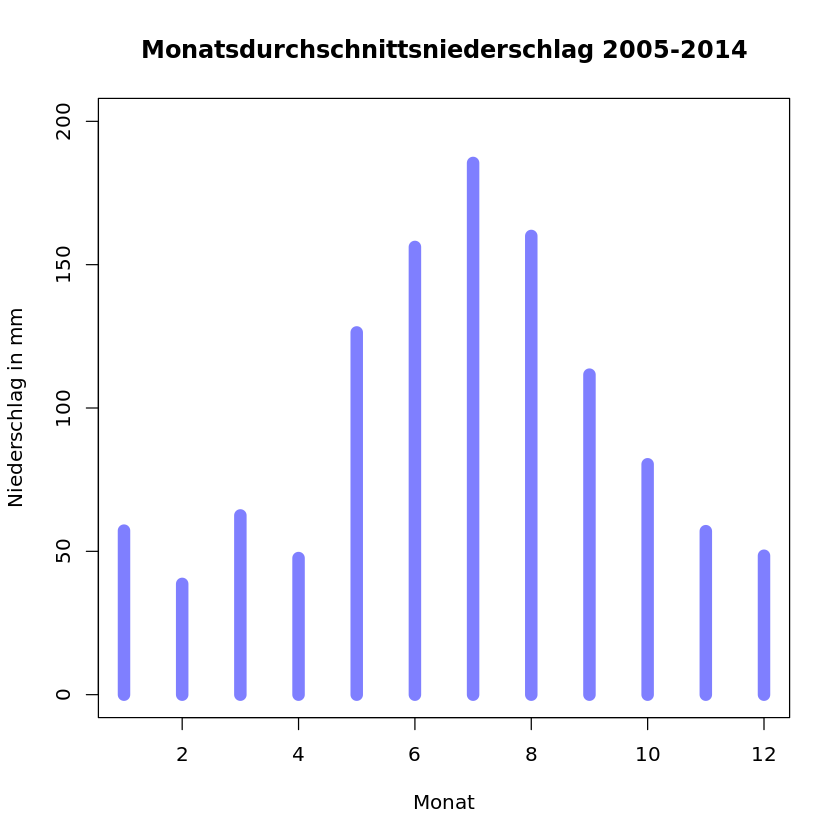

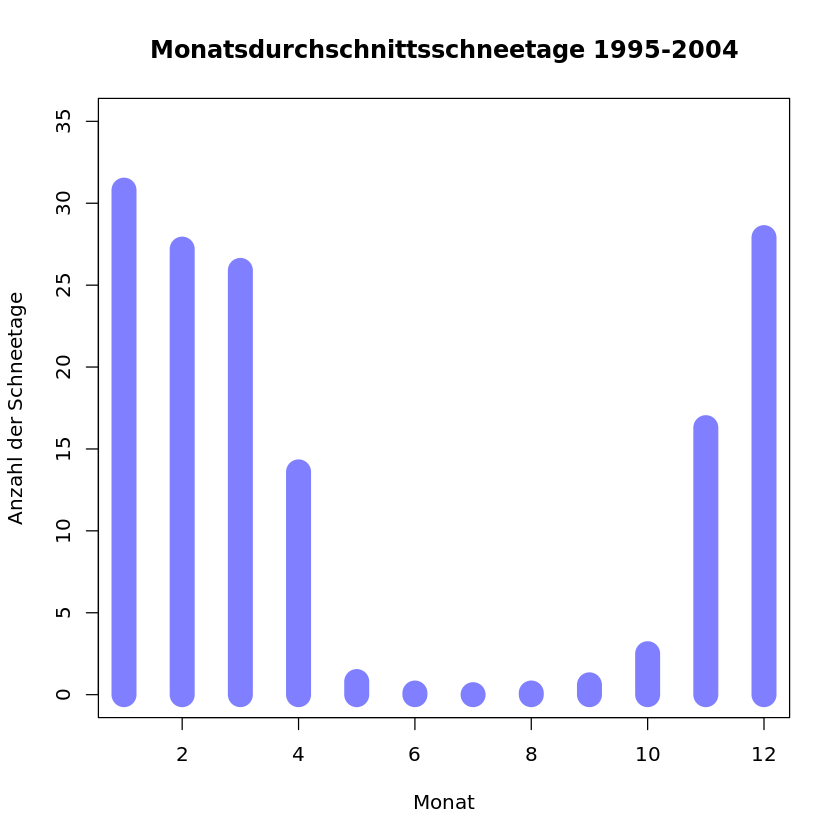

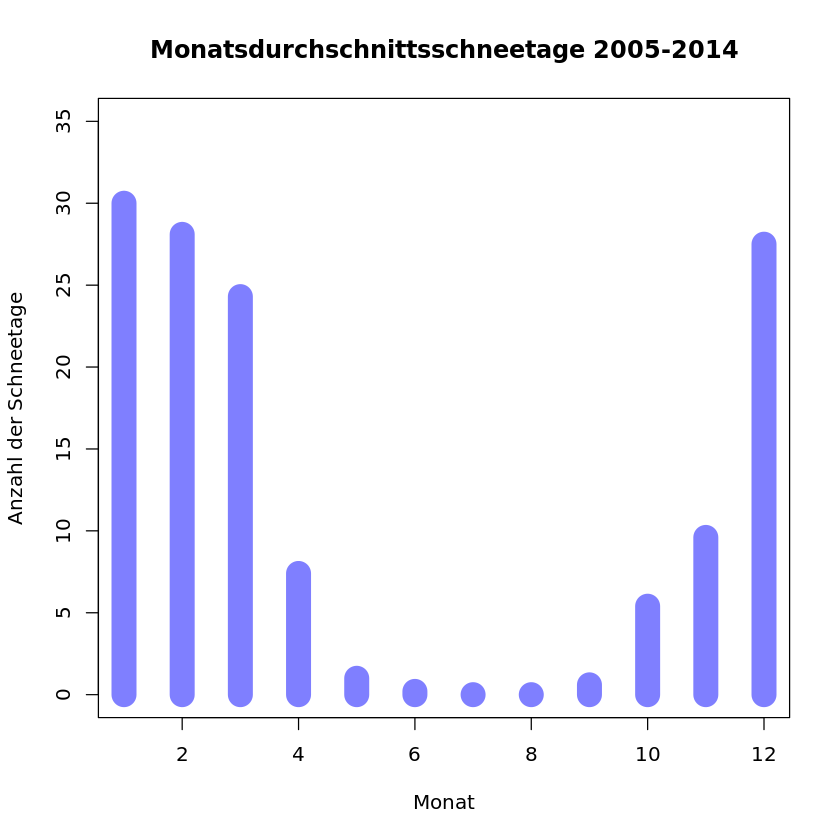

In [5]:
#Zweite Hausaufgabe Hydroklimatologie

#1. Einlesen der Daten
#library (lubridate)
mydataMeteo = read.table ("Meteo_Ramsau.dat", sep=",", dec=".", skip=4, header = TRUE)
mydataSnow = read.table ("Snow_Ramsau.csv", sep=",", dec=".", header = TRUE)

#head(mydataSnow, n=10)
#head(mydataMeteo, n=10)

#2. Veraenderung der -1 und das Datum
mydataSnow$datum = as.Date(as.character(mydataSnow$datum), "%Y%m%d")
mydataMeteo$date = as.Date(mydataMeteo$date)
#head(mydataMeteo,n=10)
#str (mydataMeteo)
mydataSnow$schnee = sapply(mydataSnow$schnee, function(y) { if (y == -1) "nan" else y })
mydataSnow$neuschnee = sapply(mydataSnow$neuschnee, function(y) { if (y == -1) "nan" else y })

#3. Spalte mit Monat und Jahr zu den Listen hinzufuegen
mydataSnow$ymd = format(mydataSnow$datum, "%Y%m%d")
mydataSnow$ym = format(mydataSnow$datum, "%Y-%m")
mydataSnow$y = format(mydataSnow$datum, "%Y")
mydataMeteo$ym = format(mydataMeteo$date, "%Y-%m")
mydataMeteo$y = format(mydataMeteo$date, "%Y")

                                                                 
#4. Zeitraum über die Jahre 1995-2015
mydataMeteo19952015 = mydataMeteo[mydataMeteo$date>="1995-01-01" & mydataMeteo$date<="2015-12-31",]
mydataSnow19952015 = mydataSnow[mydataSnow$datum>="1995-01-01" & mydataSnow$datum<="2015-12-31",]
                                                                
#5. Temperaturverlauf
tempMonthly = aggregate (temp ~ ym, data=mydataMeteo19952015, FUN=mean, na.rm=TRUE)
tempYearly = aggregate (temp ~ y, data=mydataMeteo19952015, FUN=mean, na.rm=TRUE)
tempYearly$y= as.numeric(tempYearly$y)
fitTempYearly = lm(tempYearly$temp ~ tempYearly$y)
tempYearly$meanTemp_calculated = fitted.values(fitTempYearly)
t.test(tempYearly$meanTemp_calculated, y=NULL, alternative=c("two.sided"), mu=0, paired=FALSE, var.equal=FALSE, conf.level=0,95,)
                                                                 
plot (tempYearly$y, tempYearly$temp, type="b", col=rgb(225/255,0/255,0/255, alpha=0.5), ann=FALSE, lwd=2, pch=21)
lines(tempYearly$y, tempYearly$meanTemp_calculated, type="l", col="black")
title (main="Verlauf der jährlichen Durchschnittstemp.")
title (xlab ="Jahr")
title (ylab ="Temp")
                                                                 
slope= round(coefficients(fitTempYearly)[2],2)
intercept= round(coefficients(fitTempYearly)[1], 2)
regress_function = paste("y = ", intercept, " + ", slope, " * x")
text(1999, 7, regress_function)
                                                                 
#6. Niderschlagsverlauf
precipYearly = aggregate (precip ~ y, data=mydataMeteo19952015, FUN=sum, na.rm=TRUE)
precipYearly$y= as.numeric(precipYearly$y)
fitPrecipYearly = lm(precipYearly$precip ~ precipYearly$y)
precipYearly$sumPrecip_calculated = fitted.values(fitPrecipYearly)
t.test(precipYearly$sumPrecip_calculated, y=NULL, alternative=c("two.sided"), mu=0, paired=FALSE, var.equal=FALSE, conf.level=0,95,)
                                                               
plot (precipYearly$y, precipYearly$precip, type="b", col=rgb(0/255,0/255,255/255, alpha=0.5), ann=FALSE, lwd=2, pch=21)
lines(precipYearly$y, precipYearly$sumPrecip_calculated, type="l", col="black")
                                                                 
title (main="Verlauf des jährlicher Gesamtniederschlags")
title (xlab ="Jahr")
title (ylab ="Niederschlag in mm")
                                                                 
slope= round(coefficients(fitPrecipYearly)[2],2)
intercept= round(coefficients(fitPrecipYearly)[1], 2)
regress_function = paste("y = ", intercept, " + ", slope, " * x")
text(2011, 1470, regress_function)

                        
#7. Schneedeckentage
mydataSnow19952015$schneeCount = sapply(mydataSnow19952015$schnee, function(y) { if (y == "nan") 0 else 1 })
snowDays = aggregate (schneeCount ~ y, data=mydataSnow19952015, FUN=sum, na.rm=TRUE)
snowDays$y= as.numeric(snowDays$y)
fitSnowDays = lm(snowDays$schneeCount ~ snowDays$y)
snowDays$snowDays_calculated = fitted.values(fitSnowDays)
t.test(snowDays$snowDays_calculated, y=NULL, alternative=c("two.sided"), mu=0, paired=FALSE, var.equal=FALSE, conf.level=0,95,)


plot (snowDays$y, snowDays$schneeCount, type="b", col=rgb(255/255,0/255,255/255, alpha=0.5), ann=FALSE, lwd=2, pch=22)
lines(snowDays$y, snowDays$snowDays_calculated, type="l", col="black")
                                                                 
title (main="Jährliche Schneetage")
title (xlab ="Jahr")
title (ylab ="Anzahl der Schneetage")
                                                                 
slope= round(coefficients(fitSnowDays)[2],2)
intercept= round(coefficients(fitSnowDays)[1], 2)
regress_function = paste("y = ", intercept, " + ", slope, " * x")
text(2011, 160, regress_function)

#Standartfehler = paste("Standartfehler: ", summary(fitSnowDays) [6])
#text(2011,150, Standartfehler)
#Signifikanz = paste("Signifikanz: ", summary(fitSnowDays) [7])
#text(2011,145, Signifikanz)
                                                        
#8. Vergleich monatliche Verhältnisse
#8.1 Zeitraum festlegen
mydataMeteo19952004 = mydataMeteo[mydataMeteo$date>="1995-01-01" & mydataMeteo$date<="2004-12-31",]
mydataMeteo20052014 = mydataMeteo[mydataMeteo$date>="2005-01-01" & mydataMeteo$date<="2014-12-31",]
mydataSnow19952004 = mydataSnow[mydataSnow$datum>="1995-01-01" & mydataSnow$datum<="2004-12-31",]
mydataSnow20052014 = mydataSnow[mydataSnow$datum>="2005-01-01" & mydataSnow$datum<="2014-12-31",]
mydataSnow19952004$schneeCount = sapply(mydataSnow19952004$schnee, function(y) { if (y == "nan") 0 else 1 })
mydataSnow20052014$schneeCount = sapply(mydataSnow20052014$schnee, function(y) { if (y == "nan") 0 else 1 })

#8.2.1 Monatliche Temperatur 95-04
mydataMeteo19952004$y = format(mydataMeteo19952004$date, "%Y")
mydataMeteo19952004$m = format(mydataMeteo19952004$date, "%m")

temp_monthly19952004 = aggregate(temp ~ y+m, data=mydataMeteo19952004, FUN=mean, na.rm=TRUE)
temp_twelvemonths19952004 = aggregate(temp ~ m, data=temp_monthly19952004, FUN=mean, na.rm=TRUE)

plot(temp_twelvemonths19952004$m, temp_twelvemonths19952004$temp, type="h",ylim=c(-10,20), col=rgb(0/255,0/255,255/255, alpha=0.5), ann=FALSE, lwd=20)
title(main="Monatsdurchschnittstemperatur 1995-2004")
title(xlab="Monat")
title(ylab="Temp in °C")
                                                                                
#8.2.2 Monatliche Temperatur 05-14
mydataMeteo20052014$y = format(mydataMeteo20052014$date, "%Y")
mydataMeteo20052014$m = format(mydataMeteo20052014$date, "%m")

temp_monthly20052014 = aggregate(temp ~ y+m, data=mydataMeteo20052014, FUN=mean, na.rm=TRUE)
temp_twelvemonths20052014 = aggregate(temp ~ m, data=temp_monthly20052014, FUN=mean, na.rm=TRUE)

plot(temp_twelvemonths20052014$m, temp_twelvemonths20052014$temp, type="h",ylim=c(-10,20), col=rgb(0/255,0/255,255/255, alpha=0.5), ann=FALSE, lwd=20)
title(main="Monatsdurchschnittstemperatur 2005-2014")
title(xlab="Monat")
title(ylab="Temp in °C")
                                                                
#8.3.1 Monatlicher Niederschlag 1995-2004
mydataMeteo19952004$y = format(mydataMeteo19952004$date, "%Y")
mydataMeteo19952004$m = format(mydataMeteo19952004$date, "%m")

precip_monthly19952004 = aggregate(precip ~ y+m, data=mydataMeteo19952004, FUN=sum, na.rm=TRUE)
precip_twelvemonths19952004 = aggregate(precip ~ m, data=precip_monthly19952004, FUN=mean, na.rm=TRUE)

plot(precip_twelvemonths19952004$m, precip_twelvemonths19952004$precip, type="h", ylim=c(0,200), col=rgb(0/255,0/255,255/255, alpha=0.5), ann=FALSE, lwd=10)
title(main="Monatsdurchschnittsniederschlag 1995-2004")
title(xlab="Monat")
title(ylab="Niederschlag in mm")
                                                                                
#8.3.2 Monatlicher Niederschlag 2005-2014
precip_monthly20052014 = aggregate(precip ~ y+m, data=mydataMeteo20052014, FUN=sum, na.rm=TRUE)
precip_twelvemonths20052014 = aggregate(precip ~ m, data=precip_monthly20052014, FUN=mean, na.rm=TRUE)

plot(precip_twelvemonths20052014$m, precip_twelvemonths20052014$precip, type="h",ylim=c(0,200), col=rgb(0/255,0/255,255/255, alpha=0.5), ann=FALSE, lwd=10)
title(main="Monatsdurchschnittsniederschlag 2005-2014")
title(xlab="Monat")
title(ylab="Niederschlag in mm")
                                                                                
#8.4.1 Monatliche Schneedeckentage 1995-2004
mydataSnow19952004$y = format(mydataSnow19952004$datum, "%Y")
mydataSnow19952004$m = format(mydataSnow19952004$datum, "%m")

snow_monthly19952004 = aggregate(schneeCount ~ y+m, data=mydataSnow19952004, FUN=sum, na.rm=TRUE)
snow_twelvemonths19952004 = aggregate(schneeCount ~ m, data=snow_monthly19952004, FUN=mean, na.rm=TRUE)

plot(snow_twelvemonths19952004$m, snow_twelvemonths19952004$schneeCount, type="h",ylim=c(0,35), col=rgb(0/255,0/255,255/255, alpha=0.5), ann=FALSE, lwd=20)
title(main="Monatsdurchschnittsschneetage 1995-2004")
title(xlab="Monat")
title(ylab="Anzahl der Schneetage")
                                    
#8.4.2 Monatliche Schneedeckentage 2005-2014
mydataSnow20052014$y = format(mydataSnow20052014$datum, "%Y")
mydataSnow20052014$m = format(mydataSnow20052014$datum, "%m")
                                                                                
snow_monthly20052014 = aggregate(schneeCount ~ y+m, data=mydataSnow20052014, FUN=sum, na.rm=TRUE)
snow_twelvemonths20052014 = aggregate(schneeCount ~ m, data=snow_monthly20052014, FUN=mean, na.rm=TRUE)

plot(snow_twelvemonths20052014$m, snow_twelvemonths20052014$schneeCount, type="h",ylim=c(0,35), col=rgb(0/255,0/255,255/255, alpha=0.5), ann=FALSE, lwd=20)
title(main="Monatsdurchschnittsschneetage 2005-2014")
title(xlab="Monat")
title(ylab="Anzahl der Schneetage")


2) Bei der Berechnung der monatlichen Niederschlagsmengen und Schneedeckentage müsst Ihr besonders aufpassen, diese müssen zunächst auf Monatswerte in den Jahren gebracht werden, um dann über die Jahre im Zeitraum zu Mitteln (siehe auch R-Einführung). Bedenkt dass jede Gruppierung das Datum in einen Character verwandelt, das müssen gegebenenfalls durch „as.date()“ wieder korrigieren.